In [4]:
%pip install matplotlib

  Using cached contourpy-1.3.1-cp313-cp313-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.56.0-cp313-cp313-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (101 kB)
  Using cached kiwisolver-1.4.8-cp313-cp313-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.2 kB)
  Using cached numpy-2.2.4-cp313-cp313-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached pillow-11.1.0-cp313-cp313-manylinux_2_28_x86_64.whl.metadata (9.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 6.3 MB/s eta 0:00:00a 0:00:01
Using cached contourpy-1.3.1-cp313-cp313-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (322 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.56.0-cp313-cp313-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.8 MB)
Using cache

In [7]:
import sys
import time
import math
sys.path.append("../attachments/repo")

from lib.data.dataplot import *
from lib.utils.time import *
from lib.system.cart import *
from lib.system.basic import *

In [27]:
class SystemSecondNewtonLaw:

	def __init__(self, L, R):
		self.I = 0
		self.L = L
		self.R = R

	def evaluate(self, delta_t, _input):
		out = _input / self.L * delta_t + self.I * (1 - self.R * delta_t / self.L)

		self.I = out
		return self.I

class ElectricMotor:

	def __init__(self, L, R, b, J, Kt, Ke):
		self.S1 = SystemSecondNewtonLaw(L, R)
		self.S2 = Proportional(Kt)
		self.S3 = SystemSecondNewtonLaw(J, b)
		self.S4 = Proportional(Ke)
		self.w = 0
	
	def evaluate(self, delta_t, _input):
		s1_out = self.S1.evaluate(delta_t, _input - self.w)
		s2_out = self.S2.evaluate(delta_t, s1_out)
		s3_out = self.S3.evaluate(delta_t, s2_out)

		self.w = self.S4.evaluate(delta_t, s3_out)
		return s3_out

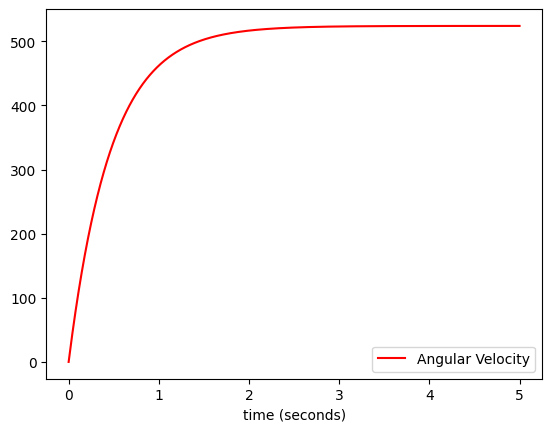

In [32]:
dp = DataPlotter()
dp.set_x("time (seconds)")
dp.add_y("ang", "Angular Velocity")

motor = ElectricMotor(
    L=130e-6,
    R=1.45,
    b=7*1e-5,
    J=0.5*0.1*0.05**2,
    Kt=0.0169,
    Ke=0.00177*60/(2*math.pi))

tension = 12

delta_t = 0.1 / 1000
t = 0
while t < 5:
    
    w = motor.evaluate(delta_t, tension)
    
    dp.append_x(t)
    dp.append_y("ang", w)

    t += delta_t

dp.plot()
